In [1]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\LENOVO\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

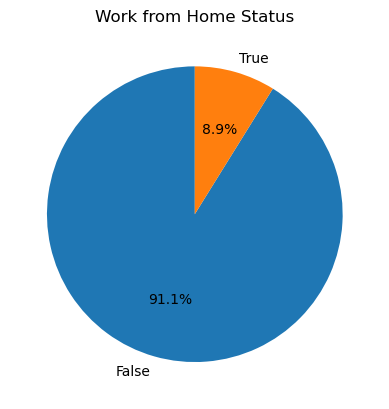

In [3]:
# Noice: here we're using the Panda's .plot() method 

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

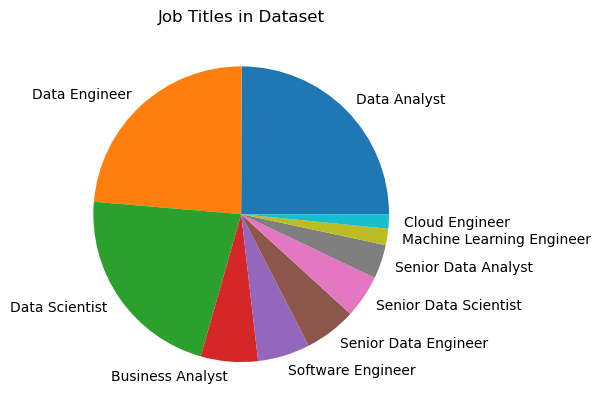

In [4]:
# When not to use a pie chart
# A pie chart is not suitable for comparing many categories with similar values.

df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles in Dataset')
plt.ylabel("")
plt.show()

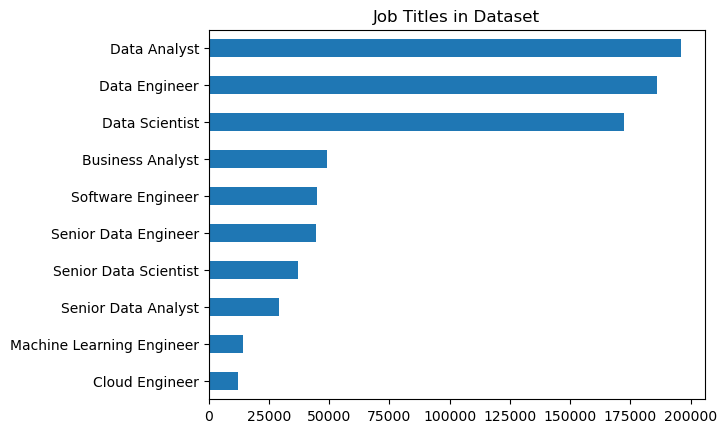

In [5]:
# When comparing many categories with similar value the bar charts is better option

df['job_title_short'].value_counts().plot(kind='barh')
plt.title('Job Titles in Dataset')
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

In [6]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


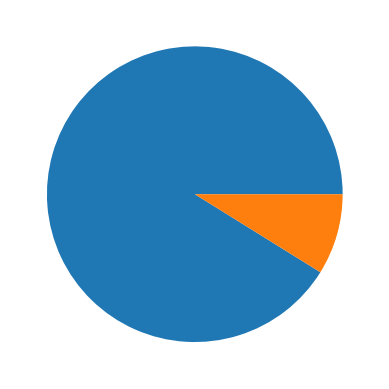

In [7]:
# Notic: here we're using the matplotlib annotation Not Pandas 
# here just trying to apply plotting on one column 'job_work_from_home' using matplotlib
# But we want to use loop because we have three different pie charts


fig, ax = plt.subplots()

ax.pie(df['job_work_from_home'].value_counts())

plt.show()

0 job_work_from_home Work From Home
1 job_no_degree_mention Job Degree Req
2 job_health_inssurance Health Insurance Offered


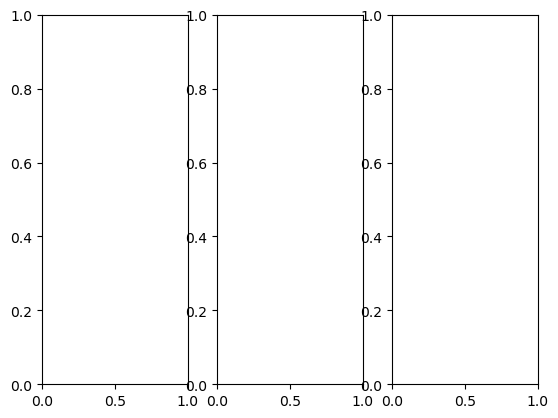

In [8]:
fig, ax = plt.subplots(1, 3) # Create one row with 3 plots (axes)

dect_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_inssurance': 'Health Insurance Offered'
}

# Loop through each key–value pair in the dictionary & enumerate will give index for each pair
# 'column' holds the key (DataFrame column name)
# 'title' holds the value (plot title text)
# 'i' is the index of each pair in the dict
# .items() is what defines that column = key and title = value for each dict entry

for i,(column, title) in enumerate(dect_column.items()):
    print(i, column, title)

plt.show()

In [10]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

In [11]:
df['job_no_degree_mention'].value_counts()

job_no_degree_mention
False    544965
True     240776
Name: count, dtype: int64

In [12]:
df['job_health_insurance'].value_counts()

job_health_insurance
False    699244
True      86497
Name: count, dtype: int64

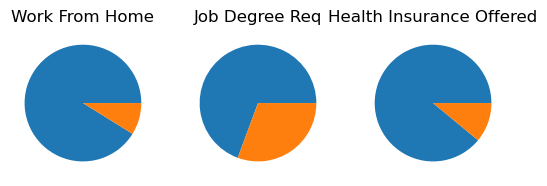

In [20]:
fig, ax = plt.subplots(1, 3)

dect_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column, title) in enumerate(dect_column.items()):
    ax[i].pie(df[column].value_counts()) # Notice: here we're using the matplotlib annotation Not .plot() method from Panda
    ax[i].set_title(title) # by accessing the axis we're just formatting each plot

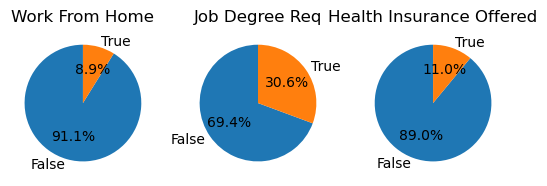

In [21]:
fig, ax = plt.subplots(1, 3)

dect_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column, title) in enumerate(dect_column.items()):

    # just more formatting for the pie charts 
    #  Notice: the order of the False and True should be this way here
    # because the Fales is more than the true values in the columns we have 
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=('False', 'True')) 
    ax[i].set_title(title)                                                                            
                                                                                                        
plt.show()

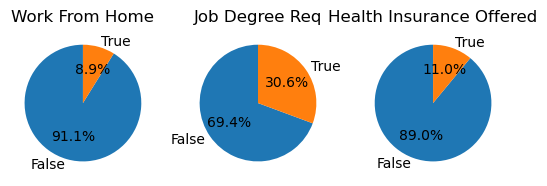

In [23]:
# It's just the previous exaple but her we're using Pandas .pot() method 
fig, ax = plt.subplots(1, 3)

dect_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column, title) in enumerate(dect_column.items()):
    
    df[column].value_counts().plot(kind ='pie', ax=ax[i],startangle=90, autopct='%1.1f%%') # here we're using the Panda's .plot() method 
    

    ax[i].set_title(title)
    ax[i].set_ylabel('') 